# Case study on Pre-processing

Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [48]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column

In [49]:
#importing data
data = pd.read_csv(r"C:\Users\Bazil\Downloads\titanic_dataset.csv",index_col="PassengerId")

In [50]:
#viewing data
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 3. Check the basic details of the dataset

In [51]:
#shape of data
data.shape

(891, 11)

In [52]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

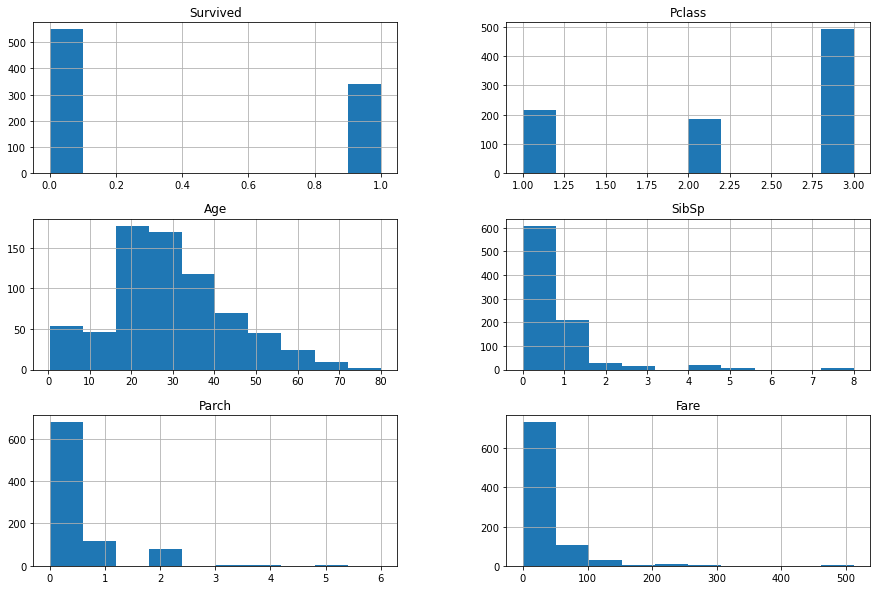

In [55]:
data.hist(figsize=(15,10))

<AxesSubplot:>

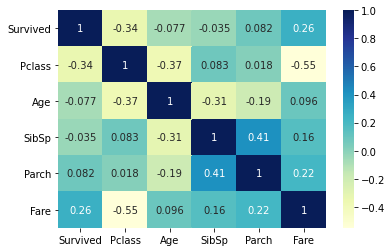

In [56]:
#corelation in data
corr=data.corr()
sns.heatmap(corr,cmap="YlGnBu",annot=True)

### 4.  Fill in all the missing values present in all the columns in the dataset

In [57]:
#viewing data columns
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [58]:
#viwing sum of missing values
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:ylabel='Frequency'>

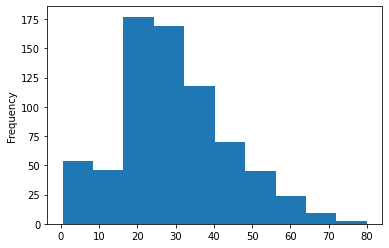

In [59]:
#distribution of age
data["Age"].plot(kind="hist")

In [60]:
#filling missing values with mean
data["Age"]=data["Age"].fillna(data["Age"].median())

In [61]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [62]:
#dropping the feature cabin due to hing missing values
data.drop("Cabin",inplace=True,axis=1)

In [63]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [64]:
#filling Embarked column
data["Embarked"]=data["Embarked"].fillna(method="ffill")

In [65]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

## Check and handle outliers in at least 3 columns in the dataset

### Handling outlier in column Age

<AxesSubplot:>

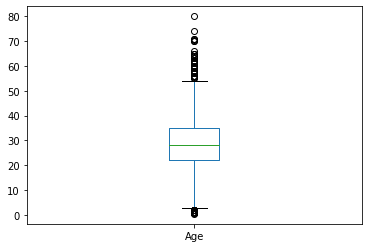

In [66]:
#Checking for outliers in Age column
data["Age"].plot(kind="box")

In [112]:
#using percentile method for handling outliers
Q1=np.percentile(data["Age"],25,interpolation="midpoint")
Q2=np.percentile(data["Age"],50,interpolation="midpoint")
Q3=np.percentile(data["Age"],75,interpolation="midpoint")
print(Q1)
print(Q2)
print(Q3)

23.0
28.0
33.0


In [68]:
#using Inter Quartile Range
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(up_lim)
print(low_lim)

54.5
2.5


In [69]:
outlier=[]
for i in data["Age"]:
    if(i<low_lim)or(i>up_lim):
        outlier.append(i)

In [70]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [71]:
up=data["Age"]>up_lim
data.loc[up].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [72]:
#dropping outliers
data.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)

In [73]:
low=data["Age"]<low_lim
data.loc[low].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [74]:
data.drop([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],inplace=True)

<AxesSubplot:>

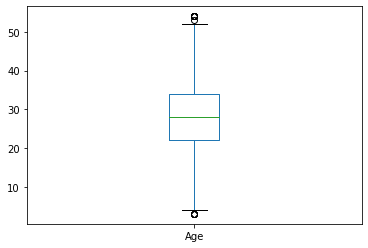

In [75]:
data["Age"].plot(kind="box")

### Handling outlier in column Fare

<AxesSubplot:>

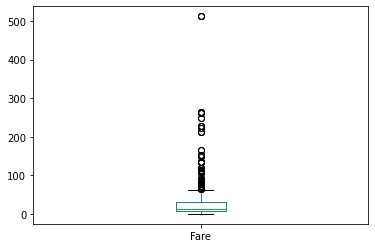

In [76]:
data.Fare.plot(kind="box")

In [77]:
#using percentile method for handling outliers
Q1=np.percentile(data["Fare"],25,interpolation="midpoint")
Q2=np.percentile(data["Fare"],50,interpolation="midpoint")
Q3=np.percentile(data["Fare"],75,interpolation="midpoint")
print(Q1)
print(Q2)
print(Q3)

7.8958
13.4167
30.0708


In [78]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

-25.366699999999994
63.333299999999994


In [79]:
outlier=[]
for i in data["Fare"]:
    if(i<low_lim)or(i>up_lim):
        outlier.append(i)

In [80]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 247.5208,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55]

In [81]:
up=data["Fare"]>up_lim
y=data.loc[up].index

In [82]:
data.drop(y,inplace=True)

<AxesSubplot:>

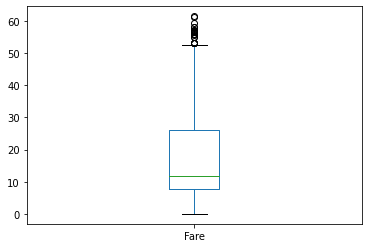

In [83]:
data.Fare.plot(kind="box")

### Handling missing values in column SibSp

<AxesSubplot:>

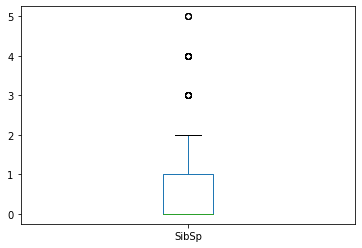

In [84]:
data["SibSp"].plot(kind="box")

In [85]:
# Handling outlier using percentile
Q1 = np.percentile(data['SibSp'],25,interpolation = 'midpoint')
Q2 = np.percentile(data['SibSp'],50,interpolation = 'midpoint')
Q3 = np.percentile(data['SibSp'],75,interpolation = 'midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [86]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

-1.5
2.5


In [87]:
outlier=[]
for i in data["SibSp"]:
    if(i<low_lim)or(i>up_lim):
        outlier.append(i)

In [88]:
outlier

[3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4]

In [89]:
up = data['SibSp'] > up_lim
data.loc[up].index

Int64Index([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851],
           dtype='int64', name='PassengerId')

In [90]:
data.drop([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ac7074fac0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac7075d1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac7074f760>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac7075d880>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac7075dbe0>],
 'means': []}

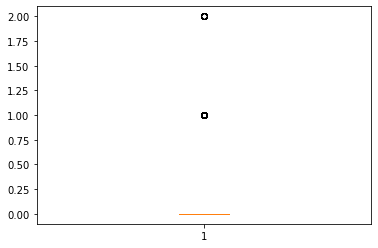

In [91]:
plt.boxplot(data["SibSp"])

## Do min max scaling on the feature set (Take ‘Survived’ as target)

In [92]:
# one hot encoding
data = pd.get_dummies(data, columns=['Sex', 'Embarked'])
data.head()


,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1
6,0,3,"Moran, Mr. James",28.0,0,0,330877,8.4583,0,1,0,1,0


In [93]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [94]:
data.drop(["Name","SibSp","Ticket"],axis=1,inplace=True)

In [95]:
data.head()

,Survived,Pclass,Age,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,22.0,0,7.2500,0,1,0,0,1
3,1,3,26.0,0,7.9250,1,0,0,0,1
4,1,1,35.0,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,8.0500,0,1,0,0,1
6,0,3,28.0,0,8.4583,0,1,0,1,0


In [96]:
#using MinMaxScaling
from sklearn.preprocessing import MinMaxScaler

In [99]:
scaler= MinMaxScaler()

In [100]:
scaled= scaler.fit_transform(data)

In [101]:
df=pd.DataFrame(scaled)

In [102]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.372549,0.0,0.118118,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,0.450980,0.0,0.129115,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.627451,0.0,0.865114,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.627451,0.0,0.131152,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.490196,0.0,0.137804,0.0,1.0,0.0,1.0,0.0


In [106]:
x=df.drop(0,axis=1)

In [108]:
x

,1,2,3,4,5,6,7,8,9
0,1.0,0.372549,0.000000,0.118118,0.0,1.0,0.0,0.0,1.0
1,1.0,0.450980,0.000000,0.129115,1.0,0.0,0.0,0.0,1.0
2,0.0,0.627451,0.000000,0.865114,1.0,0.0,0.0,0.0,1.0
3,1.0,0.627451,0.000000,0.131152,0.0,1.0,0.0,0.0,1.0
4,1.0,0.490196,0.000000,0.137804,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
684,0.5,0.470588,0.000000,0.211798,0.0,1.0,0.0,0.0,1.0
685,0.0,0.313725,0.000000,0.488765,1.0,0.0,0.0,0.0,1.0
686,1.0,0.490196,0.333333,0.382051,1.0,0.0,0.0,0.0,1.0
687,0.0,0.450980,0.000000,0.488765,0.0,1.0,1.0,0.0,0.0


In [107]:
y=df[0]

In [109]:
y

0      0.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
684    0.0
685    1.0
686    0.0
687    1.0
688    0.0
Name: 0, Length: 689, dtype: float64

In [110]:
#using linear regression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25,random_state=42)
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)

from sklearn.metrics import mean_squared_error
print('MSE is :',mean_squared_error(y_test,predictions))


MSE is : 0.1494941490923049


In [111]:
from sklearn.metrics import r2_score
print('R squared is :',r2_score(y_test,predictions))

R squared is : 0.3626480928513399
